In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newsdata/train.csv
/kaggle/input/newsdata/test.csv


In [2]:
import pandas as pd

In [3]:
train=pd.read_csv("/kaggle/input/newsdata/train.csv")
train

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
test=pd.read_csv("/kaggle/input/newsdata/test.csv")
test

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [5]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to clean text
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Apply text preprocessing
train['Description'] = train['Description'].apply(preprocess_text)
test['Description'] = test['Description'].apply(preprocess_text)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train['Description'])
X_test = vectorizer.transform(test['Description'])

# Extract labels
y_train = train['Class Index']
y_test = test['Class Index']


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['world', 'sports', 'business', 'science'])

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.8746052631578948
              precision    recall  f1-score   support

       world       0.89      0.88      0.88      1900
      sports       0.93      0.96      0.94      1900
    business       0.85      0.81      0.83      1900
     science       0.83      0.85      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
joblib.dump(nb_model, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [8]:
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [9]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [10]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=1)
nn_model.fit(X_train, y_train)
joblib.dump(nn_model, 'nn_model.pkl')

['nn_model.pkl']

In [11]:
# Load models and evaluate
models = {
    'Naive Bayes': joblib.load('naive_bayes_model.pkl'),
    'SVM': joblib.load('svm_model.pkl'),
    'KNN': joblib.load('knn_model.pkl'),
    'Neural Network': joblib.load('nn_model.pkl')
}

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['world', 'sports', 'business', 'science'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(report)

Model: Naive Bayes
Accuracy: 0.8746052631578948
              precision    recall  f1-score   support

       world       0.89      0.88      0.88      1900
      sports       0.93      0.96      0.94      1900
    business       0.85      0.81      0.83      1900
     science       0.83      0.85      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600

Model: SVM
Accuracy: 0.8928947368421053
              precision    recall  f1-score   support

       world       0.91      0.88      0.89      1900
      sports       0.94      0.96      0.95      1900
    business       0.86      0.86      0.86      1900
     science       0.86      0.87      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600

Model: KNN
Accuracy: 0.3726315789473684
  

In [16]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

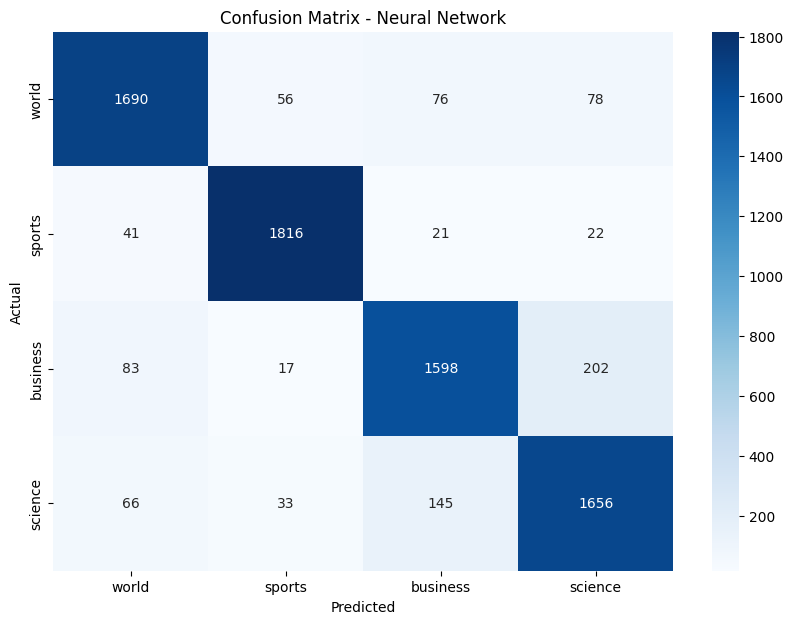

In [19]:
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['world', 'sports', 'business', 'science'], yticklabels=['world', 'sports', 'business', 'science'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print('\n' + '='*80 + '\n')

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1690,   56,   76,   78],
       [  41, 1816,   21,   22],
       [  83,   17, 1598,  202],
       [  66,   33,  145, 1656]])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt



In [27]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
joblib.dump(lr_model, 'logistic_regression_model.pkl')




/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [23]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'random_forest_model.pkl')



['random_forest_model.pkl']

In [31]:
import joblib
from sklearn.metrics import confusion_matrix

# Load models
lr_model = joblib.load('logistic_regression_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
# xgb_model = joblib.load('xgboost_model.pkl')


In [33]:
# Predict and evaluate
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
#     'XGBoost': xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['world', 'sports', 'business', 'science'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(report)


Model: Logistic Regression
Accuracy: 0.8961842105263158
              precision    recall  f1-score   support

       world       0.91      0.89      0.90      1900
      sports       0.94      0.97      0.95      1900
    business       0.86      0.86      0.86      1900
     science       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

Model: Random Forest
Accuracy: 0.8544736842105263
              precision    recall  f1-score   support

       world       0.88      0.85      0.87      1900
      sports       0.88      0.94      0.91      1900
    business       0.85      0.80      0.82      1900
     science       0.81      0.82      0.82      1900

    accuracy                           0.85      7600
   macro avg       0.85      0.85      0.85      7600
weighted avg       0.85      0.85      0.85      7600



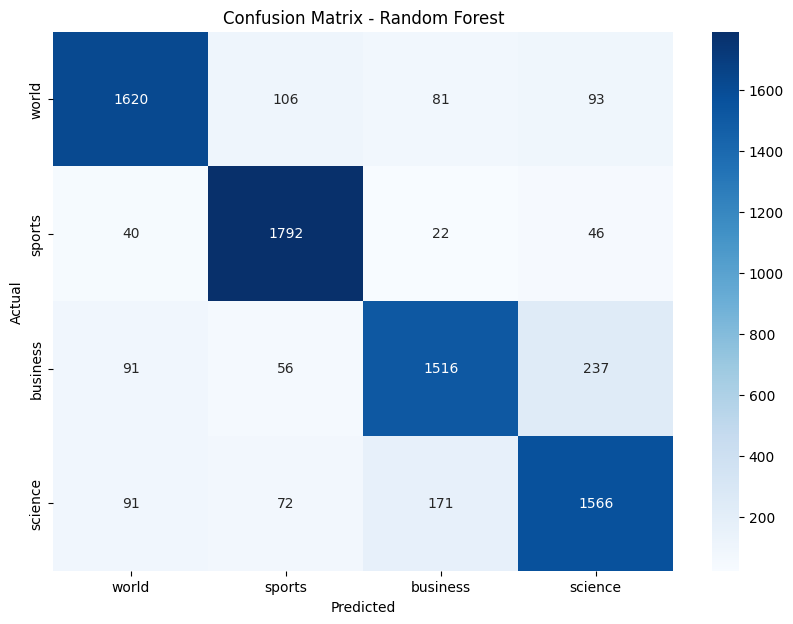

In [34]:
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['world', 'sports', 'business', 'science'], yticklabels=['world', 'sports', 'business', 'science'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print('\n' + '='*80 + '\n')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8883833333333333
              precision    recall  f1-score   support

       world       0.90      0.88      0.89     30000
      sports       0.94      0.96      0.95     30000
    business       0.87      0.85      0.86     30000
     science       0.85      0.86      0.85     30000

    accuracy                           0.89    120000
   macro avg       0.89      0.89      0.89    120000
weighted avg       0.89      0.89      0.89    120000



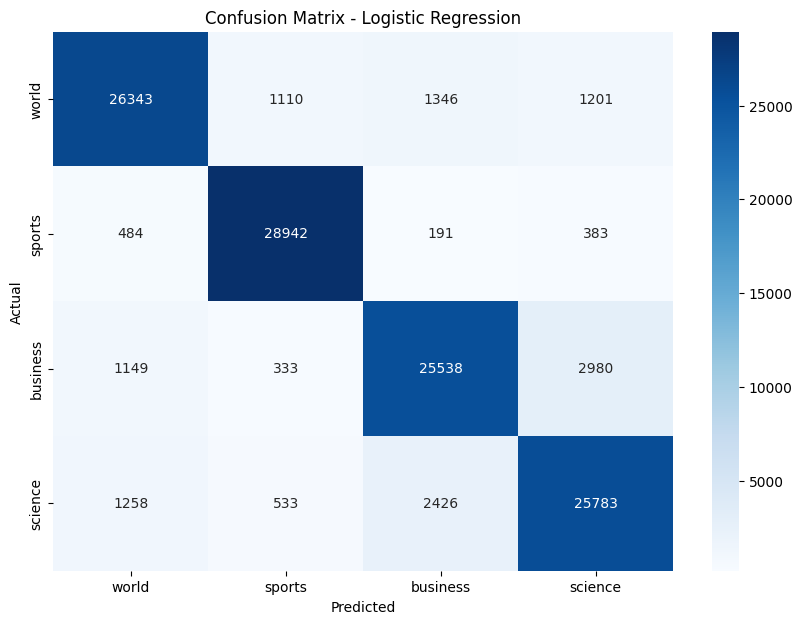



Model: Random Forest
Accuracy: 0.9984833333333333
              precision    recall  f1-score   support

       world       1.00      1.00      1.00     30000
      sports       1.00      1.00      1.00     30000
    business       1.00      1.00      1.00     30000
     science       1.00      1.00      1.00     30000

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000



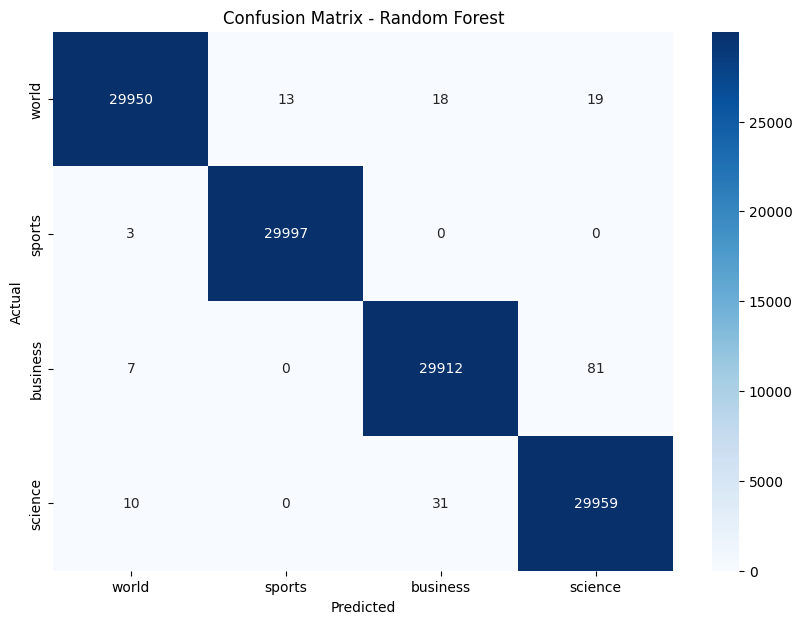



Model: XGBoost
Accuracy: 0.8876083333333333
              precision    recall  f1-score   support

       world       0.91      0.87      0.89     30000
      sports       0.92      0.95      0.93     30000
    business       0.88      0.86      0.87     30000
     science       0.84      0.87      0.85     30000

    accuracy                           0.89    120000
   macro avg       0.89      0.89      0.89    120000
weighted avg       0.89      0.89      0.89    120000



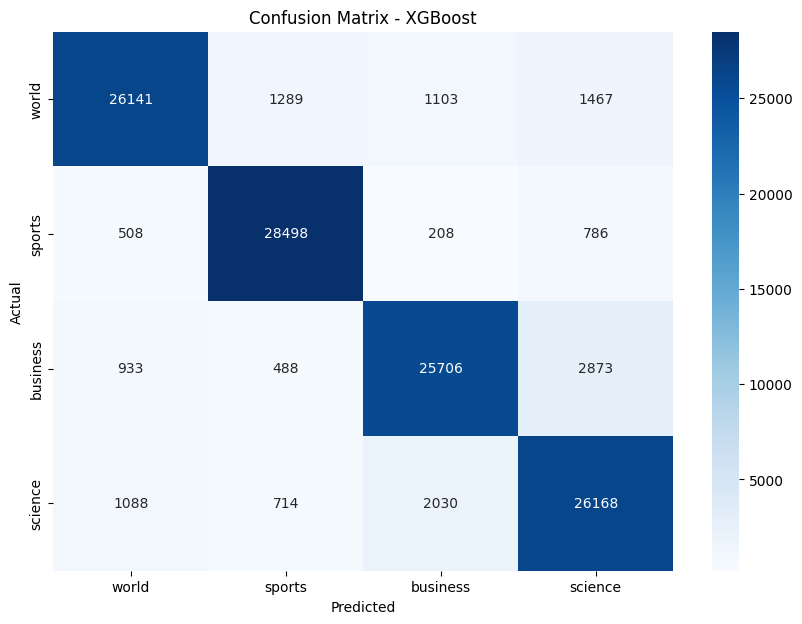

In [60]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and testing datasets
train_df = pd.read_csv('/kaggle/input/newsdata/train.csv')
test_df = pd.read_csv('/kaggle/input/newsdata/train.csv')

# Function to clean text
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Apply text preprocessing
train_df['Description'] = train_df['Description'].apply(preprocess_text)
test_df['Description'] = test_df['Description'].apply(preprocess_text)

# Adjust class labels to start from 0
train_df['Class Index'] = train_df['Class Index'] - 1
test_df['Class Index'] = test_df['Class Index'] - 1

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)  # Reduced number of features
X_train = vectorizer.fit_transform(train_df['Description'])
X_test = vectorizer.transform(test_df['Description'])

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

# Extract labels
y_train = train_df['Class Index']
y_test = test_df['Class Index']

# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
joblib.dump(lr_model, 'logistic_regression_model.pkl')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'random_forest_model.pkl')

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Load models and evaluate
models = {
    'Logistic Regression': joblib.load('logistic_regression_model.pkl'),
    'Random Forest': joblib.load('random_forest_model.pkl'),
    'XGBoost': joblib.load('xgboost_model.pkl')
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['world', 'sports', 'business', 'science'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['world', 'sports', 'business', 'science'], yticklabels=['world', 'sports', 'business', 'science'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print('\n' + '='*80 + '\n')


In [61]:
import re
import joblib
import numpy as np

# Load the trained models and vectorizer
vectorizer = joblib.load('vectorizer.pkl')
lr_model = joblib.load('logistic_regression_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
xgb_model = joblib.load('xgboost_model.pkl')

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Function to classify user input
def classify_text(user_input):
    # Preprocess the input
    processed_input = preprocess_text(user_input)
    
    # Transform the input using the vectorizer
    input_vector = vectorizer.transform([processed_input])
    
    # Predict using the models
    lr_pred = lr_model.predict(input_vector)
    rf_pred = rf_model.predict(input_vector)
    xgb_pred = xgb_model.predict(input_vector)
    
    # Convert numerical predictions back to class names
    class_names = ['world', 'sports', 'business', 'science']
    
    lr_result = class_names[lr_pred[0]]
    rf_result = class_names[rf_pred[0]]
    xgb_result = class_names[xgb_pred[0]]
    
    return lr_result, rf_result, xgb_result

# Example usage
user_input = "The latest advancements in artificial intelligence have shown remarkable progress."
lr_result, rf_result, xgb_result = classify_text(user_input)

print(f"Logistic Regression Prediction: {lr_result}")
print(f"Random Forest Prediction: {rf_result}")
print(f"XGBoost Prediction: {xgb_result}")


Logistic Regression Prediction: world
Random Forest Prediction: world
XGBoost Prediction: world


In [62]:
# Example usage
user_input = "The Supreme Court should limit Governor’s power to refer Bills to President without cause"
lr_result, rf_result, xgb_result = classify_text(user_input)

print(f"Logistic Regression Prediction: {lr_result}")
print(f"Random Forest Prediction: {rf_result}")
print(f"XGBoost Prediction: {xgb_result}")


Logistic Regression Prediction: world
Random Forest Prediction: world
XGBoost Prediction: world


In [63]:
# Example usage
user_input = "One of the biggest pivots in this Budget speech has been a shift in the stance on employment and the sharply higher frequency of mentions it received. ‘Employment’ was the central theme of the Budget, that placed the Prime Minister’s package to facilitate jobs and skills on top of its list of soothing promises. The proposed ₹2 lakh crore package seeks to help 4.1 crore youth over five years with three employment linked-incentive schemes — two of which encourage hiring of fresh entrants in the job market for at least one year with subsidies, while a third attempts to incentivise companies to scale up hiring beyond their previous year’s worker count. To bridge the gap between skill sets and available job roles, a spruce-up of 1,000 industrial training institutes with courses designed in tandem with industry has been promised, along with an ambitious internship programme for a crore youth in 500 top companies. The details of this intern placement programme will be fleshed out, but the Centre has promised to bear a bulk of the stipend involved. Firms can join the scheme on a voluntary basis and tap their mandatory corporate social responsibility funds for the remaining costs. The primacy assigned to tackling the jobs crisis, that the Opposition sought to highlight in the electoral battle, marks an acknowledgement of an issue that the government has otherwise sought to paper over"
lr_result, rf_result, xgb_result = classify_text(user_input)

print(f"Logistic Regression Prediction: {lr_result}")
print(f"Random Forest Prediction: {rf_result}")
print(f"XGBoost Prediction: {xgb_result}")

Logistic Regression Prediction: business
Random Forest Prediction: science
XGBoost Prediction: science


In [68]:
# Example usage
user_input = user_input = """Meta has introduced a new AI model called Segment Anything Model 2, or SAM 2, which it says can tell which pixels belong to a certain object in videos.
The Facebook-parent’s previously released Segment Anything Model from last year helped in the development of features in Instagram, such as ‘Backdrop’ and ‘Cutouts.’
SAM 2 is meant for video media, with Meta claiming that SAM 2 could “segment any object in an image or video, and consistently follow it across all frames of a video in real-time.”"""

lr_result, rf_result, xgb_result = classify_text(user_input)

print(f"Logistic Regression Prediction: {lr_result}")
print(f"Random Forest Prediction: {rf_result}")
print(f"XGBoost Prediction: {xgb_result}")


Logistic Regression Prediction: science
Random Forest Prediction: science
XGBoost Prediction: science


In [69]:
# Example usage
user_input = """At the 1952 Helsinki Games, wrestler KD Jadhav won India's first post-independence individual medal, a bronze. It was the first occasion when the hockey team's medal had company. But what hockey kept waiting for, since winning its first medal on 26th May 1928"""
lr_result, rf_result, xgb_result = classify_text(user_input)

print(f"Logistic Regression Prediction: {lr_result}")
print(f"Random Forest Prediction: {rf_result}")
print(f"XGBoost Prediction: {xgb_result}")


Logistic Regression Prediction: sports
Random Forest Prediction: science
XGBoost Prediction: sports
